1. Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

In [ ]:
import networkx as nx
import numpy as np

def julia_fractal(c_real, c_imag, max_iter):
    G = nx.Graph()
    x_min, x_max, y_min, y_max = -2, 2, -2, 2
    step = 0.01

    nodes = {}
    for x in np.arange(x_min, x_max, step):
        for y in np.arange(y_min, y_max, step):
            z = complex(x, y)
            iterations = 0
            while abs(z) <= 2 and iterations < max_iter:
                z = z**5 + complex(c_real, c_imag)
                iterations += 1
            if iterations == max_iter:
                node = complex(x, y)
                G.add_node(node)
                nodes[node] = len(nodes)

    for node in G.nodes():
        x, y = node.real, node.imag
        for dx in [-step, 0, step]:
            for dy in [-step, 0, step]:
                if dx != 0 or dy != 0:
                    neighbor = complex(x + dx, y + dy)
                    if neighbor in nodes:
                        G.add_edge(node, neighbor)
    return G






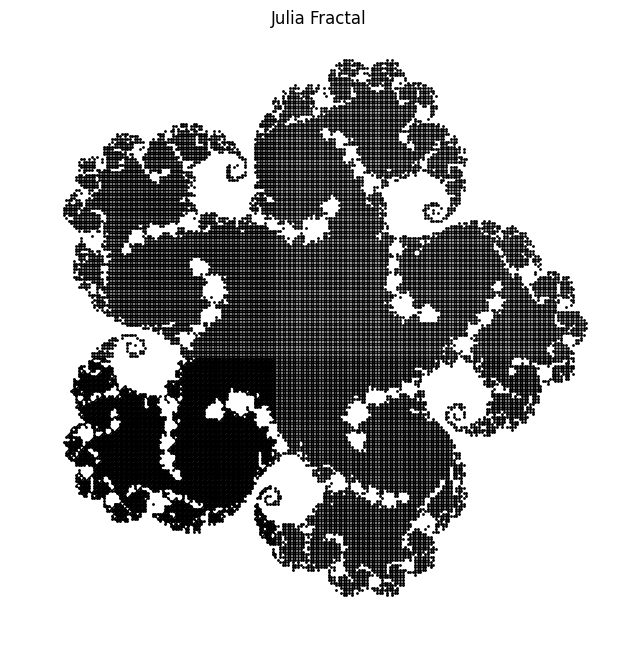

In [ ]:
import matplotlib.pyplot as plt

def plot_fractal(G, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    pos = {node: (node.real, node.imag) for node in G.nodes()}
    nx.draw(G, pos, node_size=1, node_color='black', ax=ax)
    ax.set_title(title)
    ax.set_aspect('equal')
    plt.show()


julia_graph = julia_fractal(-0.549653, 0.003, 100)
plot_fractal(julia_graph, "Julia Fractal")


2. Рассчитать среднюю степень вершины фрактального графа


In [ ]:
def average_node_degree(G):
    total_degree = sum(dict(G.degree()).values())
    average_degree = total_degree / len(G)
    return average_degree
avg_degree = average_node_degree(julia_graph)
print("Средняя степень вершины фрактального графа Жюлиа:", avg_degree)

Средняя степень вершины фрактального графа Жюлиа: 2.0556411418214773


3. Построить распределение степеней вершин фрактального графа


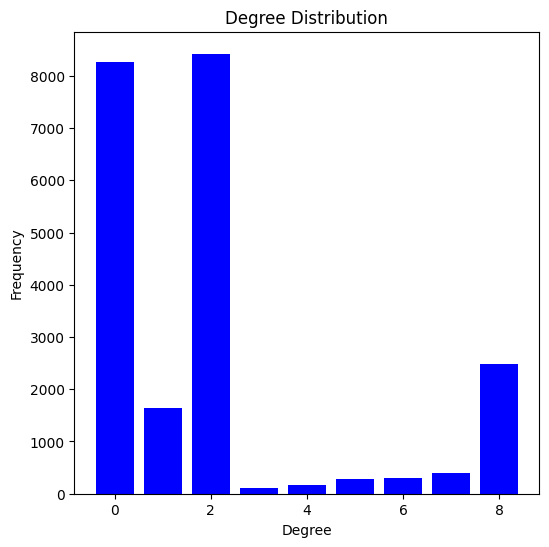

In [ ]:
def plot_degree_distribution(G):
    degrees = [G.degree(node) for node in G.nodes()]
    degree_hist = nx.degree_histogram(G)
    plt.bar(range(len(degree_hist)), degree_hist, width=0.8, color='b')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()
plot_degree_distribution(julia_graph)

4. Модифицировать исходные формулы и параметры фрактала и повторить задание с 1 по 3.

1. Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

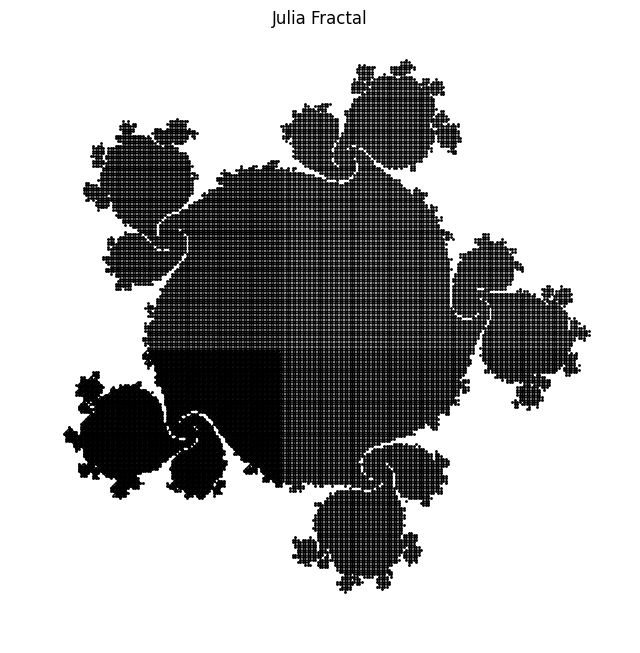

In [ ]:
julia_graph = julia_fractal(-0.7, 0.278, 100)

plot_fractal(julia_graph, "Julia Fractal")


2. Рассчитать среднюю степень вершины фрактального графа


In [ ]:
avg_degree = average_node_degree(julia_graph)
print("Средняя степень вершины фрактального графа Жюлиа:", avg_degree)

Средняя степень вершины фрактального графа Жюлиа: 2.1787211740041927


3. Построить распределение степеней вершин фрактального графа


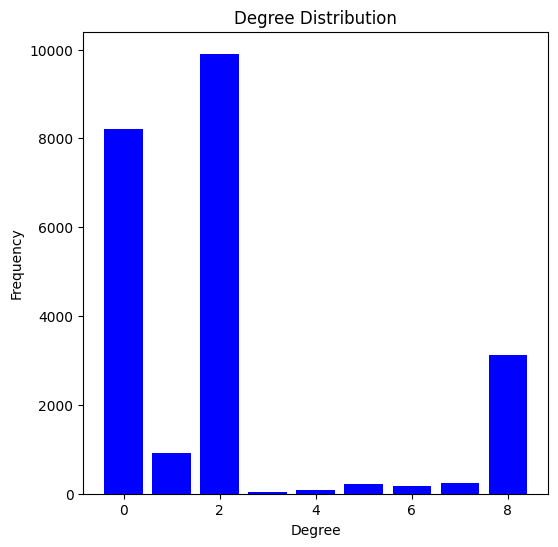

In [ ]:
plot_degree_distribution(julia_graph)